In [8]:
import pandas as pd
import os

In [2]:
import pandas as pd
batch_df = pd.read_parquet("./combined_batch_data/combined_batch_data.parquet")
batch_df

,timestamp,type,total,TruckID
0,2023-08-07 14:00:00+00:00,card,8.8,5
1,2023-08-07 14:07:00+00:00,card,8.9,5
2,2023-08-07 14:10:00+00:00,card,5.0,5
3,2023-08-07 14:12:00+00:00,card,5.0,5
4,2023-08-07 14:19:00+00:00,card,5.0,5
...,...,...,...,...
99,2023-08-07 15:15:00+00:00,card,8.9,2
100,2023-08-07 15:33:00+00:00,cash,7.0,2
101,2023-08-07 15:35:00+00:00,card,7.0,2
102,2023-08-07 15:58:00+00:00,cash,8.9,2


In [2]:
import pandas as pd
historical_df = pd.read_parquet("./combined_historical_data/combined_historical_data.parquet")

historical_df['total'] = pd.to_numeric(historical_df['total'], errors='coerce')
historical_df = historical_df.dropna(subset=['total'])
historical_df = historical_df[historical_df['total'] != 0]

historical_df['TruckID'] = historical_df['TruckID'].astype(int)
historical_df = historical_df.dropna(subset=['TruckID'])

historical_df['type'] = historical_df['type'].astype(str).str.lower()

historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'], errors='coerce')
historical_df = historical_df.dropna(subset=['timestamp'])


historical_df


,timestamp,type,total,TruckID
0,2023-07-21 09:17:00,card,7.0,1
1,2023-07-21 09:25:00,card,7.0,1
2,2023-07-21 09:49:00,card,7.0,1
3,2023-07-21 10:09:00,card,9.6,1
4,2023-07-21 10:23:00,card,10.1,1
...,...,...,...,...
6744,2023-07-27 17:51:00,cash,5.0,5
6745,2023-07-27 18:08:00,cash,5.0,5
6746,2023-07-27 18:26:00,cash,5.0,5
6747,2023-07-27 18:38:00,cash,5.0,5


In [5]:
historical_df = historical_df[historical_df['total'] < 1000]
historical_df = historical_df[historical_df['total'] > 0]

historical_df = historical_df[historical_df['timestamp'] < pd.Timestamp.now()]

historical_df



,timestamp,type,total,TruckID
0,2023-07-21 09:17:00,card,7.0,1
1,2023-07-21 09:25:00,card,7.0,1
2,2023-07-21 09:49:00,card,7.0,1
3,2023-07-21 10:09:00,card,9.6,1
4,2023-07-21 10:23:00,card,10.1,1
...,...,...,...,...
6744,2023-07-27 17:51:00,cash,5.0,5
6745,2023-07-27 18:08:00,cash,5.0,5
6746,2023-07-27 18:26:00,cash,5.0,5
6747,2023-07-27 18:38:00,cash,5.0,5


In [6]:
print("truck with highest transaction #: " + str(historical_df['TruckID'].value_counts().idxmax()) + "\n")

print("truck with lowest total transaction value: " + str(historical_df.groupby('TruckID')['total'].sum().idxmin()) + "\n")

print("average transaction value = " + str(historical_df['total'].mean()) + "\n")

print("average transaction value per truck:\n" + str(historical_df.groupby('TruckID')['total'].mean()) + "\n")

print("proportion cash transactions: " + str((historical_df['type'] == 'cash').mean()))



truck with highest transaction #: 3

truck with lowest total transaction value: 4

average transaction value = 6.526540228181953

average transaction value per truck:
TruckID
1    7.802329
2    8.042787
3    6.094108
4    3.016578
5    5.430466
6    5.867215
Name: total, dtype: float64

proportion cash transactions: 0.5148910949770337


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

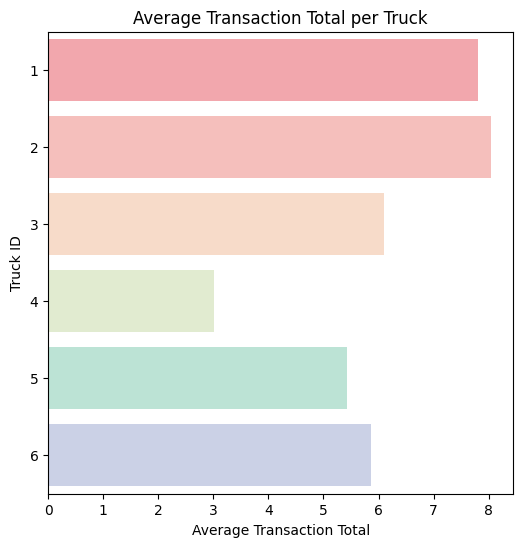

In [35]:
average_transaction_per_truck = historical_df.groupby('TruckID')['total'].mean().reset_index()

plt.figure(figsize=(6, 6))
pastel_colours = ["#FF9AA2", "#FFB7B2", "#FFDAC1", "#E2F0CB", "#B5EAD7", "#C7CEEA"]
sns.barplot(x='total', y='TruckID', orient='horizontal', data=average_transaction_per_truck, palette=pastel_colours)
plt.title("Average Transaction Total per Truck")
plt.xlabel("Average Transaction Total")
plt.ylabel("Truck ID")
plt.show()



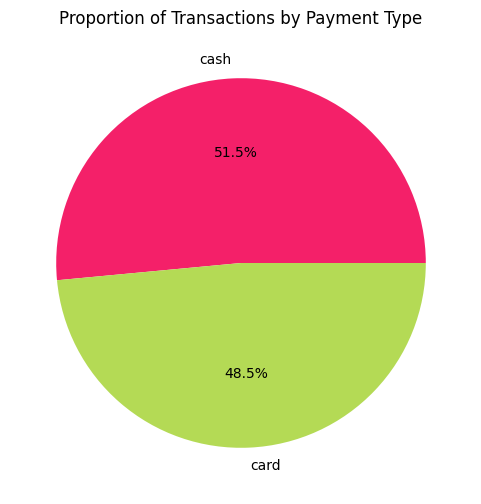

In [36]:
plt.figure(figsize=(6, 6))
cosmo_and_wanda = ["#F42069", "#B4DA55"]
cash_card_counts = historical_df['type'].value_counts()
plt.pie(cash_card_counts, labels=cash_card_counts.index, autopct='%1.1f%%', colors=cosmo_and_wanda)
plt.title("Proportion of Transactions by Payment Type")
plt.show()

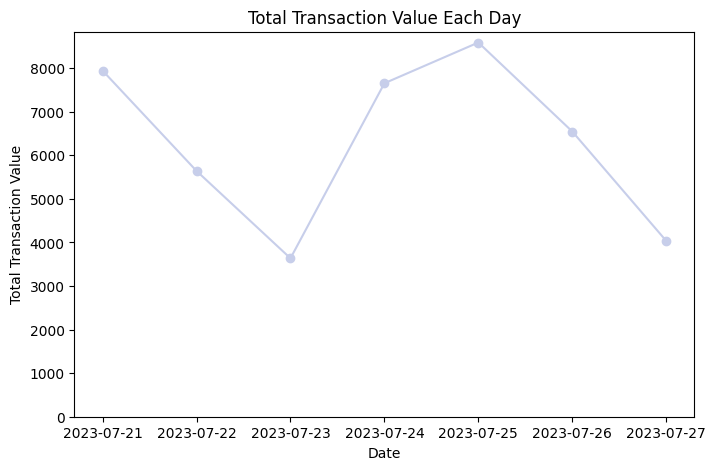

In [44]:
historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'])
daily_total = historical_df.groupby(historical_df['timestamp'].dt.date)['total'].sum()

plt.figure(figsize=(8, 5))
daily_total.plot(marker='o', linestyle='-', color="#C7CEEA")
plt.title("Total Transaction Value Each Day")
plt.xlabel("Date")
plt.ylabel("Total Transaction Value")
plt.ylim(0)
plt.show()

In [45]:
truck_metadata_df = pd.read_excel("./truck_metadata/details.xlsx")
truck_metadata_df

,ID,NAME,DESCRIPTION,HAS_CARD_READER,FSA_RATING_22
0,1,Burrito Madness,An authentic taste of Mexico.,YES,4
1,2,Kings of Kebabs,Locally-sourced meat cooked over a charcoal gr...,YES,2
2,3,Cupcakes by Michelle,"Handcrafted cupcakes made with high-quality, o...",YES,5
3,4,Hartmann's Jellied Eels,A taste of history with this classic English d...,YES,4
4,5,Yoghurt Heaven,"All the great tastes, but only some of the cal...",YES,4
5,6,SuperSmoothie,"Pick any fruit or vegetable, and we'll make yo...",NO,3


In [47]:
truck_1_df = pd.read_parquet("./historical_data/TRUCK_DATA_HIST_1.parquet")
truck_1_df

,timestamp,type,total
0,2023-07-21 09:17:00,card,7
1,2023-07-21 09:25:00,card,7
2,2023-07-21 09:49:00,card,7
3,2023-07-21 10:09:00,card,9.6
4,2023-07-21 10:23:00,card,10.1
...,...,...,...
1296,2023-07-27 18:13:00,card,7
1297,2023-07-27 18:17:00,card,8.3
1298,2023-07-27 18:23:00,cash,7
1299,2023-07-27 18:36:00,card,blank
